# COGS 108 - Final Project

# Overview
In this project, I wanted to figure out the relationship between a park's size, and its yelp rating. My goal was to see if there was a connection between how big a park is, and whether people like the park. To discover this, I utilyzed data from parks in San Diego and compared the amount of acres a park has to its yelp rating. I found that there is indeed a positive correlation between the size of a park, and how well it is reviewed on yelp, but these two variables are not directly related and is moreso caused by the size of the local population which indirectly affects park size. This analysis is significant because we can use this information to optimise park creation in San Diego by ensuring the best use of space for maximum community satisfaction.

# Name and GitHub
- Name: Jaskirat Mann
- GitHub Username: Jess-the-mann

# Research Question
Does the size of a park in terms of its acres affect that park's yelp rating in San Diego? What is the general amount of acres a park requires to recieve the best rating on yelp?

# Background and Prior Work
Parks typically have 9.5 acres per 1,000 residents, and a single park per every 2,277 residents within that jurisdiction(1). That means the average park in a normally distributed jurisdiction would be at least 19 acres. This implies that the more people there are in any given jurisdiction, the bigger the park will be, and possibly the more parks. Because of this, there is a risk of bias in terms of yelps ratings due to there being more people available to go to a bigger park as opposed to a smaller one. Understanding this, I will attempt to remedy this by comparing the amount of reviews for a given park with the amount of acres it has. This will show us if there is a significant difference caused by this. That said, San Diego differs in that its system goes by 2.8 acres per 1,000 residents, and its averages are between 21 and 43 acres(2). According to (3), the standard park size with the best results in a community is between 20-50 acres with more prominent parks reaching 100 acres, while large parks have upwards of 400 acres. There are also larger parks that can get to 1,000 acres. By taking into account all these different numbers from different sources, I created a size chart for parks in San Diego where small parks are less than 10 acres, average parks are between 10 and 50 acres, large parks are between 50 and 500 acres, and very large parks are over 500 acres.

Parkscore is a score developed by the Trust for Public Land, and is calculated by taking into account the parks median size, investment budget, amenities, and amount of people in range of the park. Since this is a well-known and trusted source, the fact that they factor a parks size into the score emphasizes how important size is for a park's ratings. Through this system, San Diego was placed 2nd in the state and 16th in the nation of park rankings(4). San Diego possessed a parkscore of 69, which factored in a population of 1,392,382 as well as a median park size score of 64 which is on the higher end(5). Since these scores are so close there may be a correlation between the two, potentially implying a positive correlation between park size and rating, but there is not enough evidence here to prove this claim.

References:
- 1) https://www.moneytalksnews.com/the-best-and-worst-u-s-cities-for-parks/
- 2) https://www.sandiego.gov/sites/default/files/navajopopparkstandard.pdf
- 3) https://www.planning.org/pas/reports/report194.htm
- 4) https://timesofsandiego.com/life/2019/05/22/san-diego-park-system-among-top-20-best-in-u-s-per-new-rankings/
- 5) https://www.tpl.org/parkscore/rankings

# Hypothesis
I hypothesize that there is a positive correlation between the size of a park and its ratings. The larger the park, the better ratings it has; while the smaller the park, the lower the ratings it gets. Larger parks are put in areas with higher populations implying more people go to those park which increases the amount of reviews, saturating the ratings and diminishing their outliers. Meanwhile, smaller parks have less reviews making them vulnerable to outliers as a smaller amount of people visit and therefore review. I also hypothesize the general amount of acres with the best rating results is between 50 and 100 acres. This amount is large enough so reviews are less prone to outliers, while also not being so big that the park becomes too daunting for visitors.

# Datasets
I will be using 3 datasets for this project which were all provided to me by my instructor. 2 of them are from Yelp, including a dataset on Yelp's California Park's user reviews; as well as a dataset for all of Yelp's California Park's locations and information. The other dataset is from the government of San Diego about the location of all San Diego Parks.

- Dataset Name: Yelp SD Reviews
- Link to the dataset: https://www.yelp.com/developers/documentation/v3/business_reviews
- Number of observations: 2,333

This dataset includes a handful of user reviews per each park in San Diego.
  
- Dataset Name: Yelp SD parks
- Link to the dataset: https://www.yelp.com/developers/documentation/v3/business_search
- Number of observations: 833

This dataset provides the information on all parks in San Diego. It includes each park's location along with information pertaining to that park as well as that parks overall rating on Yelp.

- Dataset Name: San Diego Park Locations
- Link to the dataset: https://data.sandiego.gov/datasets/park-locations/
- Number of observations: 2,769

This dataset includes various information on all the parks in San Diego which includes their location, the type of park, and the amount of acres that is in each park.

I plan to combine all these datasets by merging the name of each park from each dataset. This will allow me to compare the size of each park with its associated rating. Doing this also ensures that the dataset is correct as any parks that are absent from one or all of the datasets will be filtered out, thus making sure that the park in question is indeed a San Diego park.

# Setup

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [2]:
# Dataset for Yelp San Diego park user reviews
yelp_reviews = pd.read_csv('yelp_SD_reviews.csv')

# Dataset for Yelp San Diego park information
yelp_park = pd.read_csv('yelp_SD_parks.csv')

# Dataset for San Diego park location
location = gpd.read_file('parks_datasd.geojson')

# Data Cleaning

## Yelp_reviews

In [3]:
# Renaming columns for merging with other datasets and dropping irrelevant ones.
yelp_reviews = yelp_reviews.rename(columns={'id': 'name','rating':'user_rating'})
yelp_reviews = yelp_reviews.drop(columns = ['text'])

yelp_reviews

,name,user_rating
0,Balboa Park,5
1,Balboa Park,5
2,Balboa Park,5
3,Civita Park,5
4,Civita Park,5
...,...,...
2328,Petco Park,5
2329,Ann D. L'Heureux Memorial Dog Park,4
2330,Ann D. L'Heureux Memorial Dog Park,3
2331,Ann D. L'Heureux Memorial Dog Park,3


## Yelp_park

In [4]:
yelp_park.duplicated(subset = 'name').value_counts()

False    818
True      15
dtype: int64

I used yelp_park.duplicated(subset = 'name').value_counts() in order to check for any duplicates in the dataset. The result was that there were 15 duplicate rows, meaning the true amount of observations in this dataset is 818 rather than 833. These duplicate rows, however, were most importantly seperating the amount of reviews for the same park into different rows, so I could not simply remove the duplicate rows as that would affect the total amount of yelp reviews each park had. To fix this, I added the duplicated rows review counts together for those parks to return them to their original value.

In [5]:
# Removing irrelevant columns for cleaner data and better merging.
yelp_park = yelp_park.drop(columns = ['address','phone','id','url','longitude','latitude','is_closed'])

# In order to keep the rating the same, I create a seperate dataset for it while removing it from the original
# so that when I take the sum, the ratings will not erroneously get added together as well. 
yelp_park_rating_df = yelp_park.drop(columns = ['review_count'])
yelp_park = yelp_park.drop(columns = ['rating'])

# Drop the duplicate values so it can be merged back to yelp_park without missing variables
yelp_park_rating_df = yelp_park_rating_df.drop_duplicates(subset = 'name',keep = 'first')

# Add the duplicate rows together
yelp_park = yelp_park.groupby(['name']).sum().reset_index()

# Merge the two datasets back together.
yelp_park = pd.merge(yelp_park, yelp_park_rating_df, on = 'name')

yelp_park

,name,review_count,rating
0,13th & Market,85,3.5
1,1935 Cactus Garden,1,5.0
2,4S Patriot Park,16,4.5
3,4S Ranch Community Park,17,5.0
4,5 Star Dealer School,1,5.0
...,...,...,...
813,Windwood Park,3,3.5
814,Working Class,498,4.5
815,You & Yours Distilling Co,185,5.0
816,Zeglio Custom Clothiers,76,5.0


## Yelp

In [6]:
# Merge both Yelp datasets together for a dataframe that includes the user reviews as well.
yelp = pd.merge(yelp_reviews, yelp_park, on = 'name')
yelp = yelp[['name','review_count','user_rating','rating']]

yelp

,name,review_count,user_rating,rating
0,Balboa Park,2105,5,5.0
1,Balboa Park,2105,5,5.0
2,Balboa Park,2105,5,5.0
3,Civita Park,46,5,4.5
4,Civita Park,46,5,4.5
...,...,...,...,...
2328,Petco Park,1667,5,4.0
2329,Ann D. L'Heureux Memorial Dog Park,50,4,3.0
2330,Ann D. L'Heureux Memorial Dog Park,50,3,3.0
2331,Ann D. L'Heureux Memorial Dog Park,50,3,3.0


## Location

In [7]:
# Dropped irrelevant columns and renamed others in order to clean up the data and prepare it to merge.
location = location.drop(columns = ['objectid','name','park_type','location','owner','geometry'])
location = location.rename(columns={'alias':'name','gis_acres':'acres'})
location

,name,acres
0,South Carlsbad State Beach,115.895878
1,Torrey Pines State Beach,67.294309
2,Ruocco Park,3.312526
3,Tuna Harbor Park,0.639035
4,San Diego Bayfront Park,3.669272
...,...,...
2764,San Luis Rey River Park,712.262117
2765,Horse Creek Ridge Sports Park,8.398529
2766,Harmony Grove Village 4th of July Park,2.510408
2767,Harmony Grove Village Community Park,3.575260


In [8]:
# Doing the following operation reveals that we have several duplicates
location['name'].value_counts()
# Sense the number of duplicates is so large, this would especially interfere with our data due to an 
# increased amount of false ratings when we merge locations with yelp's parks.
# After analyzing the dataset I discovered the source of the problem. 
# The location dataset randomly divides parks by splitting up the parks acres into smaller pieces.
# In order to fix this, I first identified all the duplicates, then summed the values of each parks acres in order to 
# return the parks acres to its correct state


Los Penasquitos Canyon Open Space    176
Canyon Hills Open Space              125
Mission Trails Open Space            121
Scripps Miramar Open Space           120
34th St Canyon Open Space            108
                                    ... 
Nestor Park                            1
Rho Mission Cyn Park                   1
Lake Poway Park                        1
South Oceanside School Park            1
Monroe Street Pool                     1
Name: name, Length: 956, dtype: int64

In [9]:
# First I merged the location with yelp_park in order to filter out all the parks that don't have ratings.
location = pd.merge(location, yelp_park, on = 'name')

# Drop columns so they don't get summed up as well allowing me to later merge again with yelp_park
location = location.drop(columns = ['rating','review_count'])

# Add duplicates
location = location.groupby(['name']).sum().reset_index()

location

,name,acres
0,4S Ranch Community Park,3.241830
1,Ashley Falls Park,11.660442
2,Balboa Park,1089.476460
3,Big Rock Park,5.674329
4,Black Mountain Open Space Park,2366.775467
...,...,...
105,Vista Pacifica Park,6.872379
106,Waterfront Park,12.693865
107,Western Hills Park,12.823290
108,Westview Park,8.645989


In order to analyze the data more efficiently, I created a function that will allow me to make categorical data based on the amount of acres a park has. These categories are based on my park size scale I created in the background and prior works section

In [10]:
def convert_size(acres):
    acres = round(acres)
    try:
        if acres < 10:
            value = 'small'
        elif 10 <= acres <= 50:
            value = 'average'
        elif 51 <= acres <= 500:
            value = 'large'
        else:
            value = 'very large'
    except:
        value = np.nan
    return value

In [11]:
# Create a new column with the results
location['park_size'] = location['acres'].apply(convert_size)

location

,name,acres,park_size
0,4S Ranch Community Park,3.241830,small
1,Ashley Falls Park,11.660442,average
2,Balboa Park,1089.476460,very large
3,Big Rock Park,5.674329,small
4,Black Mountain Open Space Park,2366.775467,very large
...,...,...,...
105,Vista Pacifica Park,6.872379,small
106,Waterfront Park,12.693865,average
107,Western Hills Park,12.823290,average
108,Westview Park,8.645989,small


## Ratings_size & All_reviews_size

Now I finally merge all my datasets into two seperate dataframes: One without the user ratings, and one with the user ratings. This is because incorporating all the user ratings skews the data analysis when analyzing all other variables due to nature of having multiple different reviews to the same park location. Not doing this results in data wrongfully having larger values in the analysis sense the analysis will count all the duplicates as a new value, rather than multiple values for one location.

In [12]:
# Create a new dataframe by merging location and yelp_park to get one that can compare each park's size and rating
ratings_size = pd.merge(location, yelp_park, on = 'name')

ratings_size

,name,acres,park_size,review_count,rating
0,4S Ranch Community Park,3.241830,small,17,5.0
1,Ashley Falls Park,11.660442,average,2,4.5
2,Balboa Park,1089.476460,very large,2105,5.0
3,Big Rock Park,5.674329,small,31,4.5
4,Black Mountain Open Space Park,2366.775467,very large,48,4.0
...,...,...,...,...,...
105,Vista Pacifica Park,6.872379,small,1,4.0
106,Waterfront Park,12.693865,average,242,4.5
107,Western Hills Park,12.823290,average,22,3.5
108,Westview Park,8.645989,small,7,3.5


In [13]:
# Merge location and yelp for a new dataframe that incorporates the multiple user ratings for each park
all_reviews_size = pd.merge(location, yelp, on = 'name')

all_reviews_size

,name,acres,park_size,review_count,user_rating,rating
0,4S Ranch Community Park,3.241830,small,17,5,5.0
1,4S Ranch Community Park,3.241830,small,17,4,5.0
2,4S Ranch Community Park,3.241830,small,17,5,5.0
3,Ashley Falls Park,11.660442,average,2,5,4.5
4,Ashley Falls Park,11.660442,average,2,4,4.5
...,...,...,...,...,...,...
341,Westview Park,8.645989,small,7,4,3.5
342,Westview Park,8.645989,small,7,4,3.5
343,Windwood Park,1.173010,small,3,4,3.5
344,Windwood Park,1.173010,small,3,3,3.5


# Data Analysis and Results

To start, I'm going to plot a scatter matrix to see the relationships between all the variables

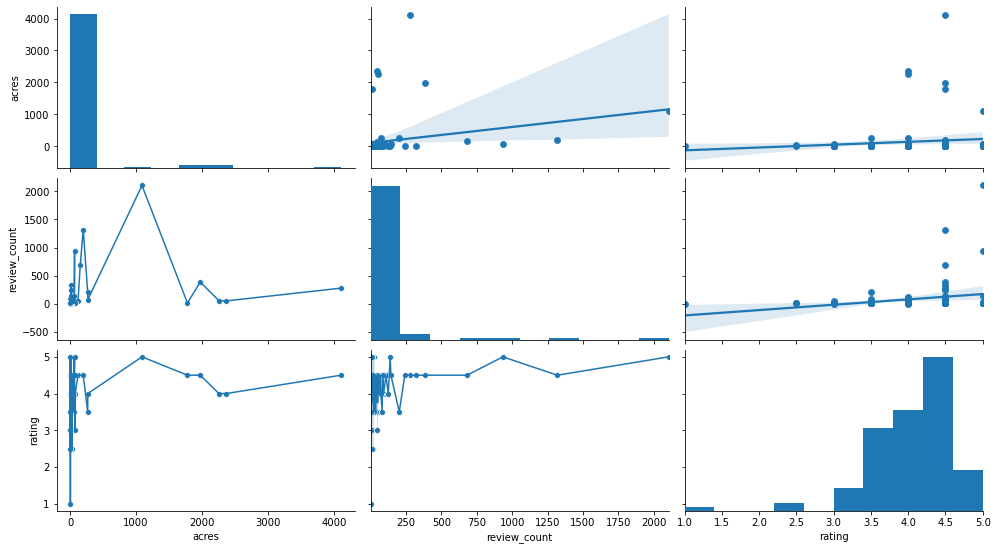

In [14]:
g = sns.pairplot(ratings_size, height = 2.5, aspect = 1.8);

g.map_lower(sns.lineplot)
g.map_upper(sns.regplot)

At a glance this tells us a lot about the relationship between all our variables. By looking at the bottom-left and top-right plots, we can already see a positive correlation between a park's acres and rating. The more acres the park has, the higher the rating, meanwhile all the low ratings occur when there are only a few acres. However, this does not factor in all the variables and biases which may strongly influence these results, potentially giving us different outcomes alltogether. Upon observation of the linear regression models, it is apparent that there are significant outliers.

To get a better understanding of the relationship between these variables and the size of the parks, I have plotted the same scatter matrix again, but this time detailing the values by categorizing them based on size.

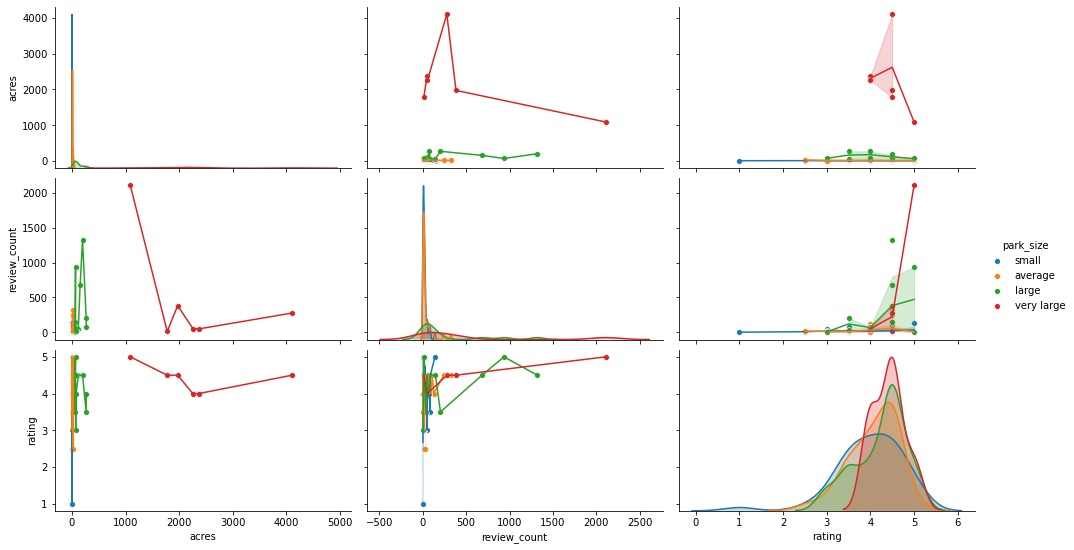

In [15]:
g = sns.pairplot(ratings_size, hue = "park_size", hue_order = ['small', 'average', 'large', 'very large'],
diag_kind = 'auto', height = 2.5, aspect = 1.8);

g.map_lower(sns.lineplot)
g.map_upper(sns.lineplot)

With the categorization of the multiple values for each plot, we can now see the causes of all the outliers. The parks with the largest size produce these insane values, while the smaller parks barely make a dent. Now that we can see these variables, these outliers no longer matter. This is because each park size possesses its own correlation to each of the variables independent of the other park sizes which, as the plots show us, results in a seperation of the outliers while grouping those outliers together. It is now clear by looking at the bottom-left and top-right plots why we originally got our answer. The reason the ratings improve as the acres do was because parks with a large amount of acres get consistently high ratings, while smaller parks, as seen in the bottom-right plot, have more variance and are prone to outliers within their ratings.

Now let's analyze a plot showing us the amount of each park's size in our dataset, and one showing the amount of each rating.

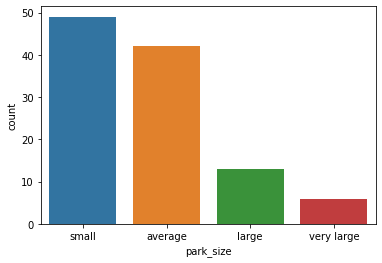

In [16]:
sns.countplot(ratings_size['park_size'], order = ['small', 'average', 'large', 'very large']);

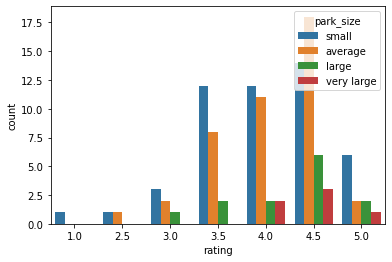

In [17]:
sns.countplot(ratings_size['rating'], hue = ratings_size['park_size'], hue_order = ['small', 'average', 'large', 'very large']);

The amount of smaller(small and average) parks are significantly greater than the amount of larger(large and very large) parks.

We can also see that the small parks ratings vary significantly. On one hand, they make up the entirety of the 1 star ratings and are more common in the lower ratings then the other sizes, but on the other, they make up a majority of the higher ratings as well losing out only in the 4.5 star rating category to average sized parks. Meanwhile very large parks are few in number, but are localized entirely with high ratings. 

This is a problem, as statistically, the very large park would be the best, but there aren't enough parks to truly know. To change this, analyzing the amount of review will help

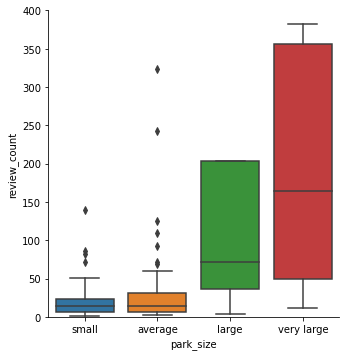

In [18]:
ax = sns.catplot(x = 'park_size', y = 'review_count', kind = 'box', order = 
['small', 'average', 'large', 'very large'], data = ratings_size);
ax.set(ylim=(0, 400))

Here we see that the larger parks have a considerably larger amount of reviews compared to smaller parks. Even with the significant outliers assisting the small parks, the large parks still tower over them. We can see now that San Diego contains a lot of small parks, but few people go, and it has few large parks, but numerous people go.

Now why do larger parks have very few in quantity, but make up for it in terms of quality?

To explain this, I will use the user ratings to show the more impactful results.

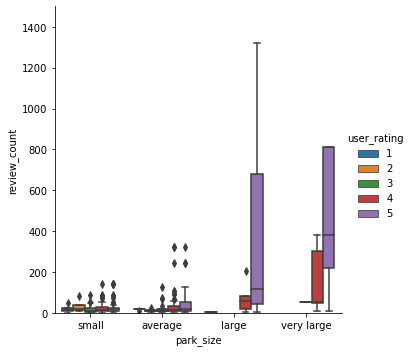

In [19]:
ax = sns.catplot(x = 'park_size', y = 'review_count', kind = 'box', order = 
['small', 'average', 'large', 'very large'], hue = 'user_rating', data = all_reviews_size);
ax.set(ylim=(0, 1500))

The results highlight the difference between big and small parks. Large parks do not just get higher ratings, they consistently get numerous glowing reviews. Based on this, it is clear that bigger parks recieve higher ratings than smaller ones. 

But what is the reason for this? Recall in my prior research section the amount of acres a park usually takes up. The amount is purely reliant on the population of the jurisdiction. This means that the more people there are in a jurisdiction, the bigger the park will be.

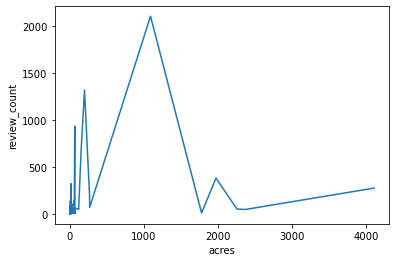

In [20]:
ax = sns.lineplot(x = 'acres', y = 'review_count', data = ratings_size);

This plot shows us that the bigger the park is, the more reviews it has, until it gets too big. Therefore we can say that a bigger park means more people are coming to the park

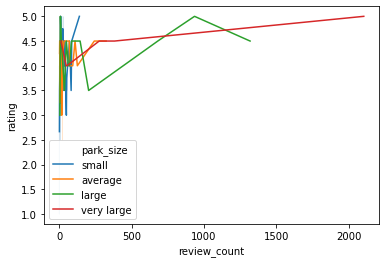

In [21]:
sns.lineplot(ratings_size['review_count'], ratings_size['rating'], hue = ratings_size['park_size'],
hue_order = ['small','average','large','very large']);

This plot tells us the greater the amount of reviewes there are, the higher the rating is. Thus, the reason for bigger parks recieving higher reviews is not cause of their size, but because there are more people going to the park and reviewing it. 

Why are more people visiting these larger parks as opposed to smaller ones? It's not because they hate small parks, rather it's because they have access to the bigger ones. Bigger parks are built in areas with bigger population, thus, bigger parks get more reviews because there is a large amount of people visiting them compared to smaller ones which, are built in areas with a small population resulting in less reviews and vulnerability to outliers in the rating system. Bigger parks are rated higher, but that's because if someone gives that park a low rating, it will barely make a dent in its overall rating.

This is proved the following plot which shows the user ratings as opposed to the overall ratings.

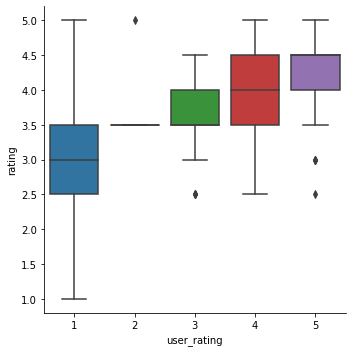

In [22]:
ax = sns.catplot(x = 'user_rating', y = 'rating', kind = 'box', data = all_reviews_size);

This plot shows us that users give 1 star ratings to all parks no matter what that parks overall rating is. This is where small parks take a hit. If they were rated 5 stars and received a 1 star rating, their overall rating would drop depending on how many other reviews there were. Whereas if they gave a large park a 1 star rating, the overall rating wouldn't even budge due to the sheer number of positive reviews for it.

This is shown in this next plot.

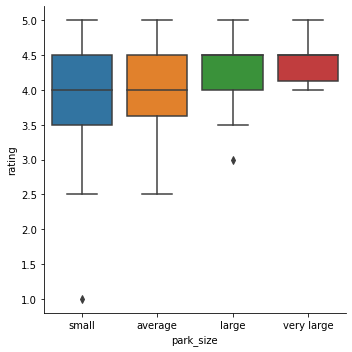

In [23]:
ax = sns.catplot(x = 'park_size', y = 'rating', kind = 'box', order = 
['small', 'average', 'large', 'very large'], data = ratings_size);

Therefore, the amount of acres needed for a San Diego park to get high ratings is impossible to answer. While the more acres a park has the higher its rating is, may be true, the higher rating is not caused by the parks size, but the amount of people going to the park. This amount directly relates to the parks size due to the park itself having more acres because of the large amount of people.

# Ethics and Privacy
All the data I used gave no personal information away. Park location data contained no personal information at all, and Yelps data only had information on the park, and users scores. I removed the user reviews column in the dataset that contained the text of their review which prevents potentially using that text to find the users on yelp. 

Admittedly, there is an abundance of bias in this dataset. First, the ratings for all these parks in San Diego is confined to Yelp, which already limits a large number of people. Second, there is a bias stemming from who the ratings are from, people willing to review parks on Yelp. This means that we only have the data of the type of people who like to leave reviews, which limits the dataset from the average person who does not care for leaving reviews. Lastly, there is a bias in terms of each of the parks location. All the parks are in San Diego, but in different parts, so while one park may have a community who frequents parks, another might barely have visitors. This in conjunction with the fact that bigger parks are built near larger populations imply a significant bias of the community in each park, which potentially skews the data.

# Conclusion and Discussion

While the result comparing park's sizes to their ratings gave us a positive correlation, it might moreso be a spurious correlation. This result was due to the fact that larger parks are built in areas with a lot of people. The greater the population close to a park, the more people go to that park. The more people that go to that park, the more reviews that park will receive. 

Thus, while my hypothesis was correct and a greater park size means a higher rating, the result was most likely not due to the size of the park, rather it is the other way around. The park has an increased size BECAUSE of the size of the local population, which results in higher ratings for that park since more people have access to that park and can review it, thus saturating the ratings preventing outliers.

This is important as it explains why larger parks are more well-recieved. These parks are generally built in areas with an increased population. So this research can be used to find more areas with denser populations and build parks there.